In [26]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [27]:
#data to dataframe
data = 'Data/insurance.csv'
df = pd.read_csv(data)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Q1. Do smokers have higher insurance charges than non-smokers?

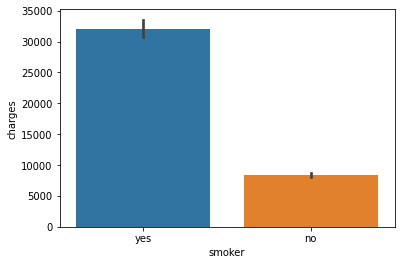

In [38]:
#visualize the differences with a bar chart
sns.barplot(data=df, x='smoker',y='charges');

In [29]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['smoker'].unique():
    ## Get series for group and rename
    data = df.loc[df['smoker']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['yes', 'no'])

In [30]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
yes,274.0,5.564931e-14,61.039414
no,1064.0,1.919313e-69,316.452808


In [31]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
yes,274.0,5.564931e-14,61.039414,True
no,1064.0,1.919313e-69,316.452808,True


In [33]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.f_oneway(*groups.values())
result

F_onewayResult(statistic=2177.614868056519, pvalue=8.271435842182967e-283)

#### Q1. Do smokers have higher insurance charges than non-smokers?
Null Hypothesis: Smokers have the same charges as non-smokers

Alternative Hypothesis: Smokers have different charges compared to non-smokers

Result: since the p-value is greater than alpha (0.05) we reject the Null Hypothesis and conclude that Smokers have different charges compared to non-smokers

### Q2. Are men more likely to smoke than women?

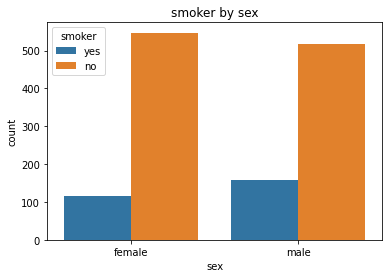

In [42]:
#visualize
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("smoker by sex");

In [43]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [44]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [45]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

#### Q2. Are men more likely to smoke than women?
Null Hypothesis: men are not more likely to smoke compared to women

Alternative Hypothesis: men are more likely to smoke compared to women

Result: since the p-value (~0.0065) is less than alpha (0.05) we accept the Null Hypothesis and conclude that men are not more likely to smoke compared to women

### Q3. Do different regions have different charges, on average?

In [49]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
## save the values and labels
values = df['charges']
labels = df['region']

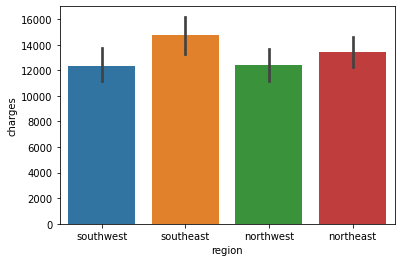

In [50]:
#visualize the differences with a bar chart
sns.barplot(data=df, x='region',y='charges');

In [48]:
## perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8397,0.7245,-3428.9653,1451.2859,False
northeast,southeast,1328.9934,0.4745,-1044.9756,3702.9623,False
northeast,southwest,-1059.4582,0.6792,-3499.5838,1380.6674,False
northwest,southeast,2317.8331,0.0583,-54.2028,4689.869,False
northwest,southwest,-70.6185,0.9999,-2508.8634,2367.6265,False
southeast,southwest,-2388.4515,0.0477,-4760.4874,-16.4157,True


#### Q3. Do different regions have different charges, on average?
Null Hypothesis: regions do not have different charges on average

Alternative Hypothesis: regions do have different charges on average

Result: since there are multiple examples where the p-value is greater than alpha (0.05) we reject the Null Hypothesis and accept the Alternative Hypothesis 